In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score
from sklearn.neural_network import MLPClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", sep=";")

In [6]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
for col in data.columns:
  print(data[col].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 261  149  226 ... 1246 1556 1868]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19

In [ ]:
for col in data.columns:
  print(data[col].value_counts())

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes   

In [7]:
# Excluimos "duration" y tratamos los valores faltantes
data.drop('duration', axis=1, inplace=True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
# Los valores faltantes no son nulos, son codificados como "unknown"
data.replace("unknown", np.nan, inplace=True)
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

# "default" tiene un numero significante de nulos
# el resto de las columnas creemos que podríamos remplazar los nulos con el modo sin introducir un sesgo significante
# podemos asumir que el 90%+ de los "unknown" de "default" son un "no"
# pero como son muchos datos podría introducir un sesgo importante, vamos a estudiar la variable

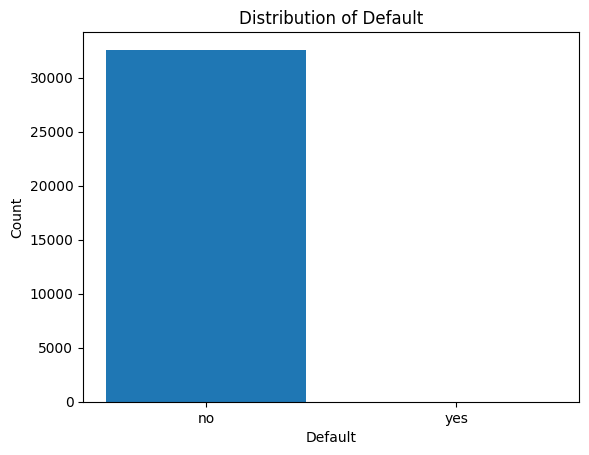

In [ ]:
default_counts = data['default'].value_counts()

plt.bar(default_counts.index, default_counts.values)
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Distribution of Default')
plt.show()

In [ ]:
cross_tab = pd.crosstab(data['default'], data['job'])
print(cross_tab)

job      admin.  blue-collar  entrepreneur  housemaid  management  retired  \
default                                                                      
no         9129         6088          1155        741        2466     1327   
yes           0            0             0          0           0        0   

job      self-employed  services  student  technician  unemployed  
default                                                            
no                1139      3053      771        5765         776  
yes                  0         0        0           2           1  


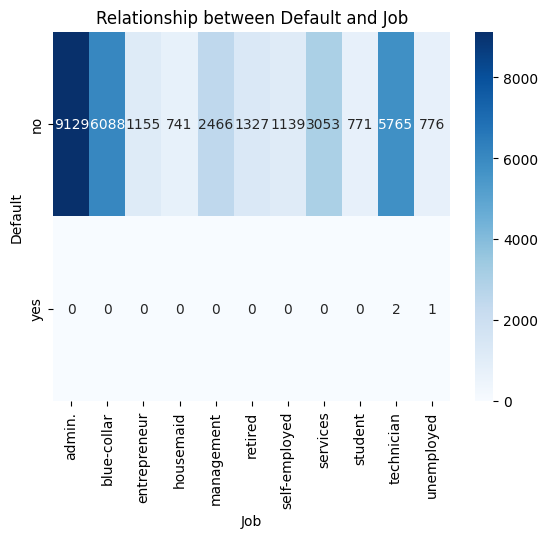

In [ ]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Job')
plt.ylabel('Default')
plt.title('Relationship between Default and Job')
plt.show()

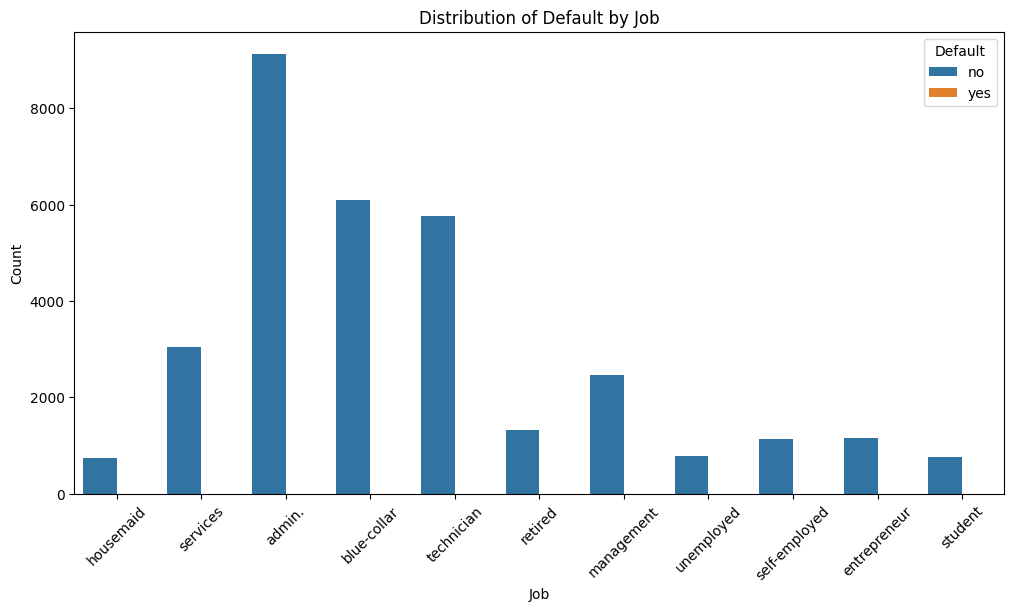

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='default', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Default by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Default', loc='upper right')
plt.show()

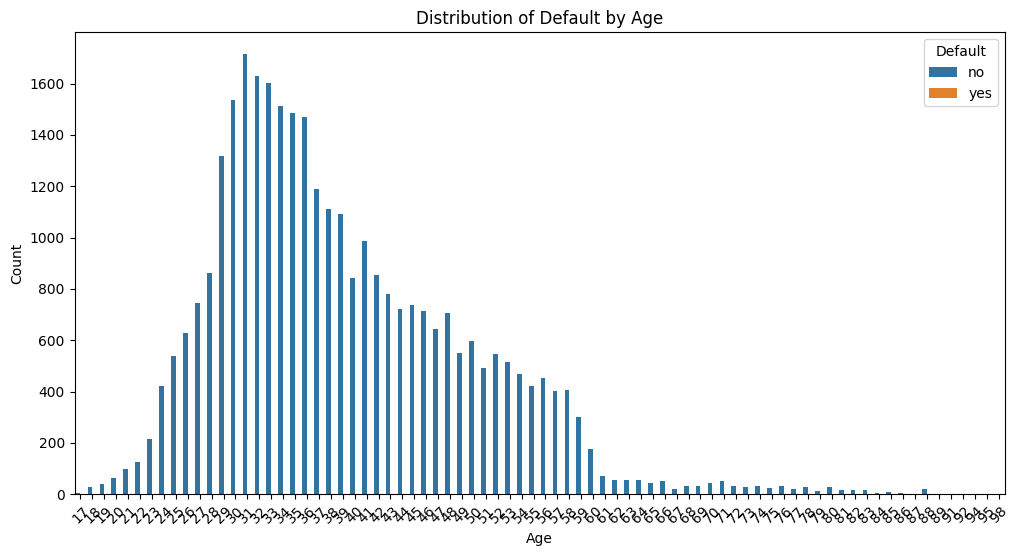

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='default', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Default by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Default', loc='upper right')
plt.show()

# Dada la distribución extremadamente desequilibrada de la categoría "sí"
# sería difícil evaluar su impacto en la variable objetivo o evaluar su importancia a través de las pruebas estadísticas
# puede no proporcionar suficiente evidencia para establecer una fuerte asociación con la variable objetivo
# se vuelve menos significativo considerar la variable debido a su falta de variabilidad y representación limitada

In [9]:
data = data.drop("default", axis=1)
data

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


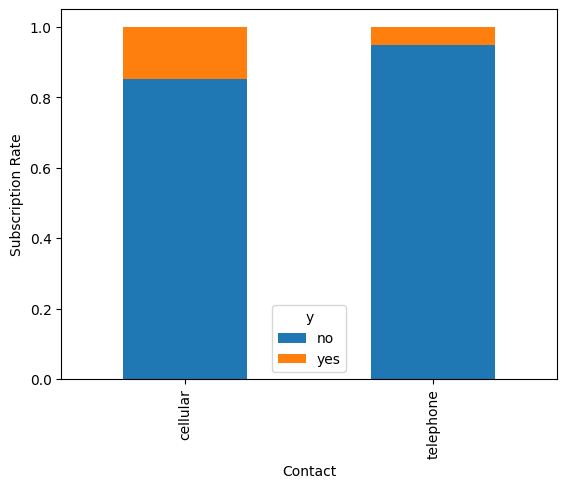

In [ ]:
# Dudo que sea importante la variable "contact", vamos a investigarlo
contact_grouped = data.groupby('contact')['y'].value_counts(normalize=True).unstack()
contact_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Contact')
plt.ylabel('Subscription Rate')
plt.legend(title='y')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['contact'], data['y'])

# chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 862.3183642075705
p-value: 1.5259856523129964e-189


# El valor p es la probabilidad de observar un estadístico chi-cuadrado tan extremo como el calculado
# En este caso, la hipótesis nula es que no existe asociación entre "contacto" e "y"
# Un valor p muy pequeño sugiere que es poco probable que la asociación observada se deba únicamente al azar
# los resultados indican una fuerte asociación estadística entre la variable "contacto" y la variable objetivo "y"

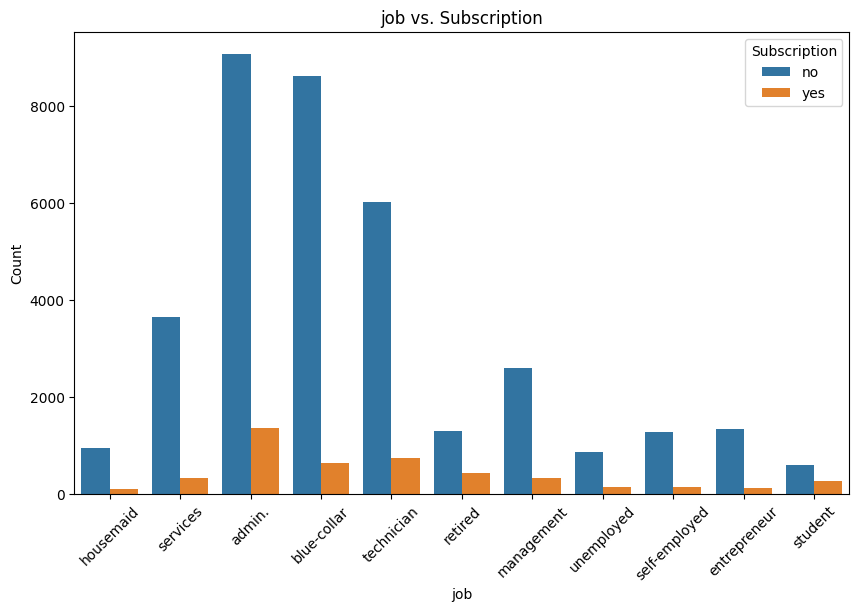

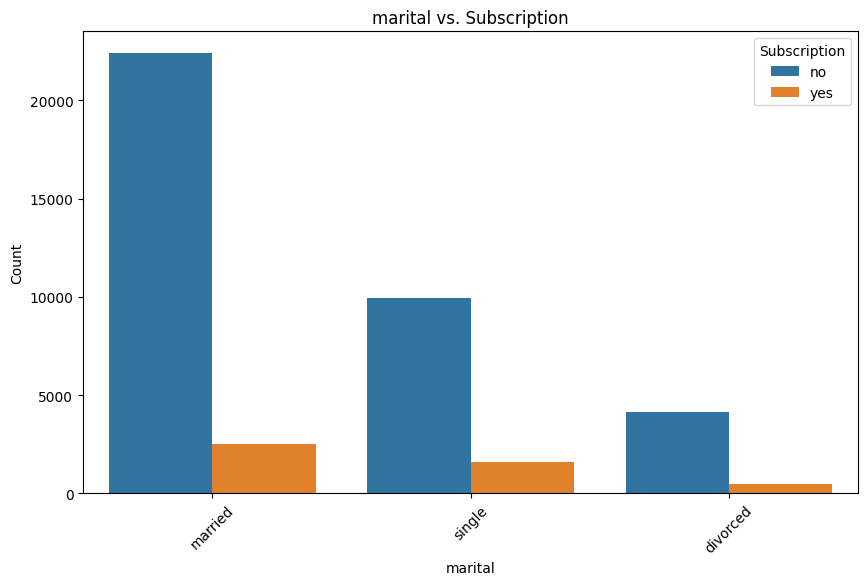

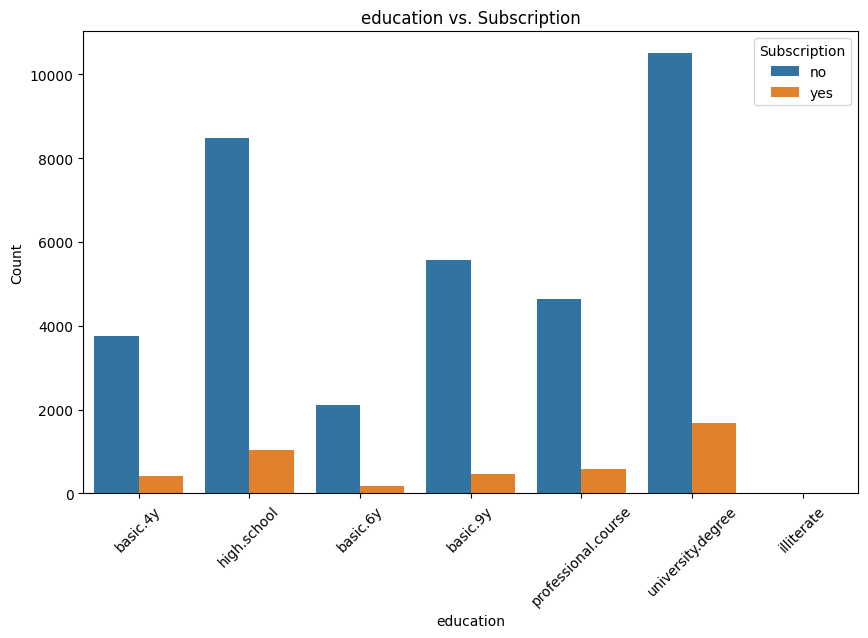

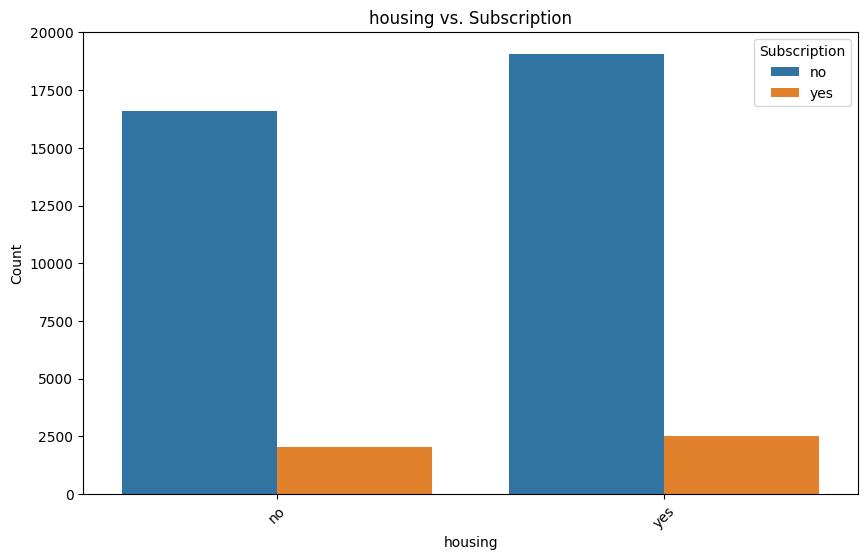

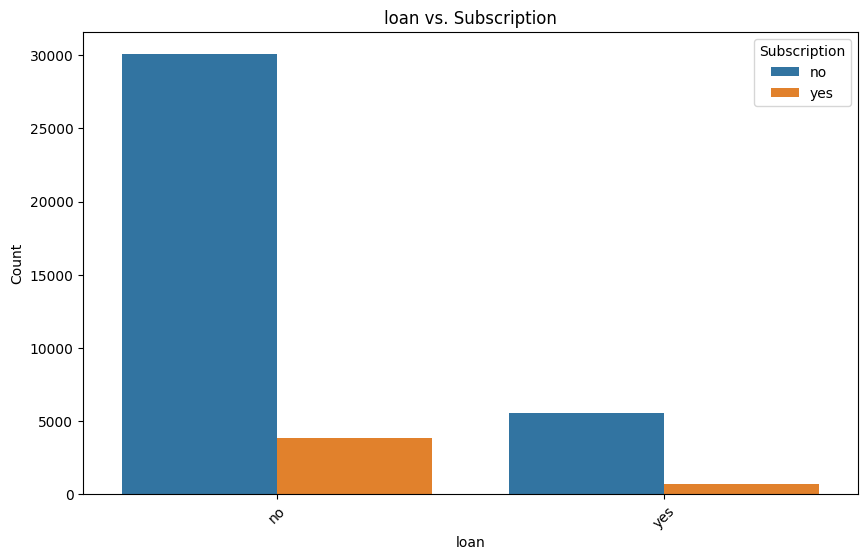

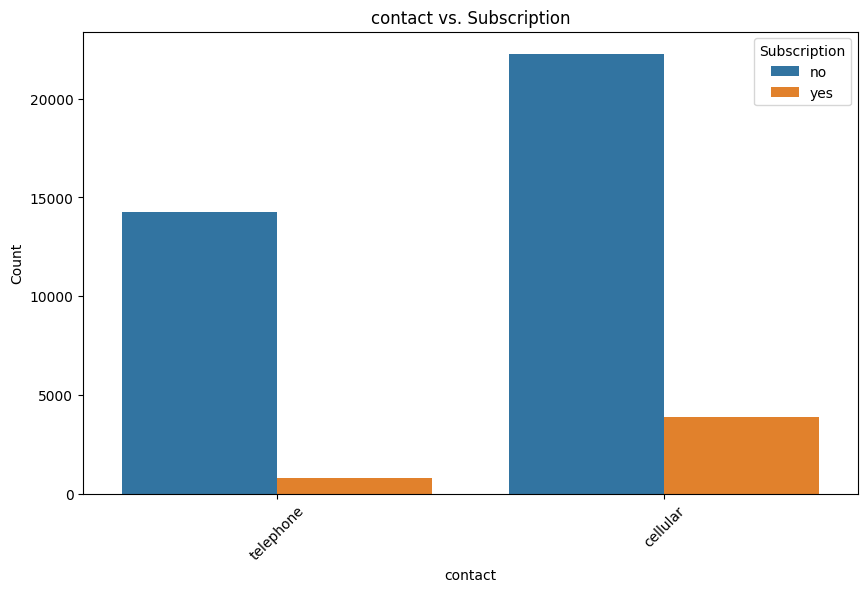

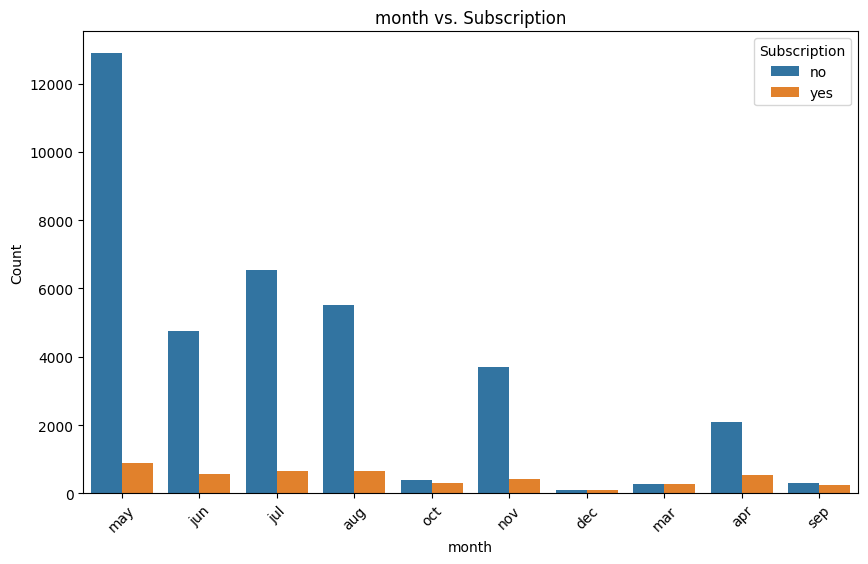

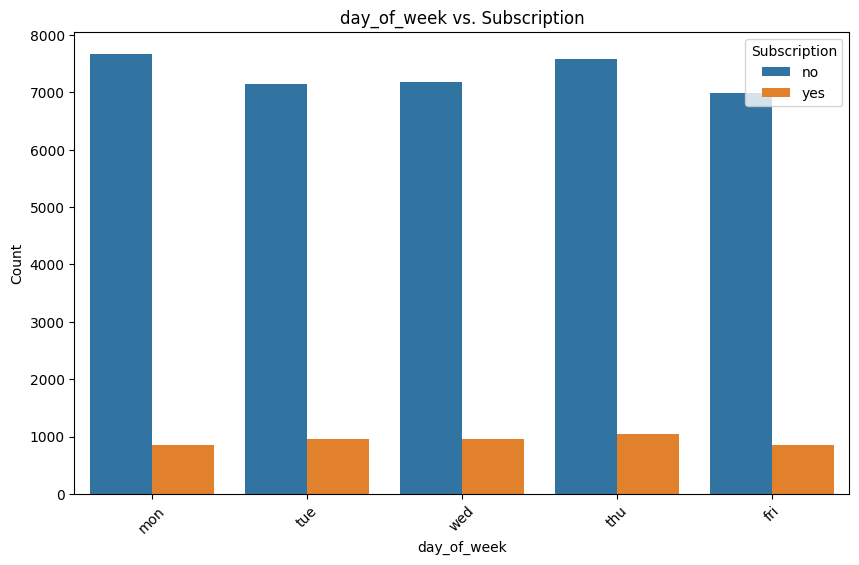

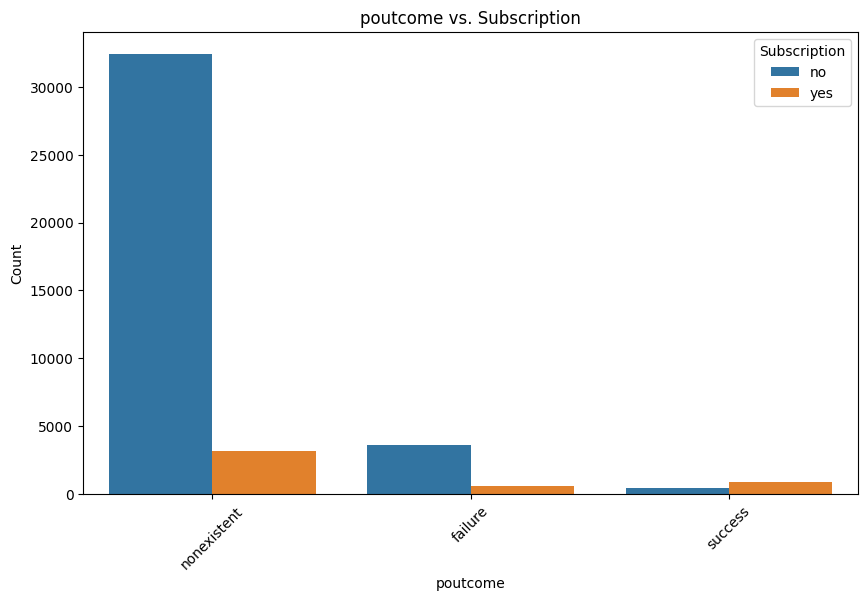

In [ ]:
categorical_vars = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='y', data=data)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} vs. Subscription')
    plt.xticks(rotation=45)
    plt.legend(title='Subscription', loc='upper right')
    plt.show()

In [10]:
# Aparte de "default", que ya hemos eliminado, el resto de las columnas tienen relativamente pocos valores nulos
# Decidimos remplazarlos con el modo, no debería introducir un sesgo importante y lo vemos mejor que borrar las filas
data['job'].fillna(data['job'].mode()[0], inplace=True)
data['marital'].fillna(data['marital'].mode()[0], inplace=True)
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['housing'].fillna(data['housing'].mode()[0], inplace=True)
data['loan'].fillna(data['loan'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
for col in data.columns:
  print(data[col].value_counts())

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64
married     25008
single      11568
divorced     4612
Name: marital, dtype: int64
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64
yes    22566
no     18622
Name: housing, dtype: int64
no     34940
yes     6248
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oc

In [11]:
# OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']])
data['education'] = ordinal_encoder.fit_transform(data[['education']])

# LabelEncoder
label_cols = ['marital', 'job', 'month', 'day_of_week', 'poutcome', 'housing', 'loan', 'contact', 'y']
label_encoder = LabelEncoder()
for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [12]:
data

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1.0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,4.0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4.0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2.0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4.0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5.0,1,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5.0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6.0,1,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5.0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
for col in data.columns:
  print(data[col].value_counts())

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
0     10752
1      9254
9      6743
7      3969
4      2924
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
Name: job, dtype: int64
1    25008
2    11568
0     4612
Name: marital, dtype: int64
6.0    13899
4.0     9515
3.0     6045
5.0     5243
1.0     4176
2.0     2292
0.0       18
Name: education, dtype: int64
1    22566
0    18622
Name: housing, dtype: int64
0    34940
1     6248
Name: loan, dtype: int64
0    26144
1    15044
Name: contact, dtype: int64
6    13769
3     7174
1     6178
4     5318
7     4101
0     2632
8      718
9      570
5      546
2      182
Name: month, dtype: int64
2    8623
1    8514
4    8134
3    8090
0    7827
Name: day_of_week, dtype: int64
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      

In [13]:
numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [14]:
# 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)
cluster_labels = kmeans.labels_

# Nueva Columna
data['cluster'] = cluster_labels
print(data['cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    25444
1    15744
Name: cluster, dtype: int64


In [ ]:
data

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,1.533034,3,1,1.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,0
1,1.628993,7,1,4.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,1
2,-0.290186,7,1,4.0,1,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,1
3,-0.002309,0,1,2.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,0
4,1.533034,7,1,4.0,0,1,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,5,1,5.0,1,0,0,7,0,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,1
41184,0.573445,1,1,5.0,0,0,0,7,0,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0
41185,1.533034,5,1,6.0,1,0,0,7,0,-0.204909,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,1
41186,0.381527,9,1,5.0,0,0,0,7,0,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,1


In [ ]:
import plotly.express as px

plot_df = data[['job', 'age', 'cluster']]

fig = px.scatter(plot_df, x='job', y='age', color='cluster', symbol='cluster',
                 title='Cluster Visualization', labels={'feature1': 'Feature 1', 'feature2': 'Feature 2'},
                 hover_data=['cluster'])

fig.update_layout(
    title={
        'text': 'Cluster Visualization',
        'x': 0.5,  # Center align the title
        'y': 0.95,  # Adjust the vertical position of the title
        'xanchor': 'center',  # Set the anchor point for x-axis
        'yanchor': 'top'  # Set the anchor point for y-axis
    },
    showlegend=False
)
fig.show()


In [ ]:
silhouette_avg = silhouette_score(data.drop('cluster', axis=1), data['cluster'])
print("The Silhouette Score is:", silhouette_avg)

The Silhouette Score is: 0.3128990788530354


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

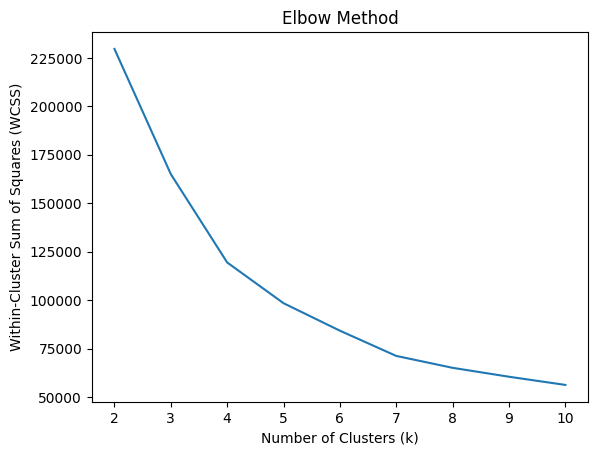

In [ ]:
features = data[['age', 'job', 'education']].values

k_values = range(2, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(k_values, wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [15]:
cluster_0_data = data[data['cluster'] == 0]
cluster_1_data = data[data['cluster'] == 1]

cluster_0_data = cluster_0_data.reset_index(drop=True)
cluster_1_data = cluster_1_data.reset_index(drop=True)

# CSV files
cluster_0_data.to_csv('cluster_0_data.csv', index=False)
cluster_1_data.to_csv('cluster_1_data.csv', index=False)

In [16]:
cluster_0_data

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,1.533034,3,1,1.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,0
1,-0.002309,0,1,2.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,0
2,1.820911,0,1,5.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,0
3,0.093650,1,1,6.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,0
4,0.093650,1,1,6.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25439,-0.865939,0,2,6.0,1,0,0,7,2,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.493457,-2.815697,1,0
25440,-0.194227,3,0,4.0,1,1,0,7,2,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.493457,-2.815697,0,0
25441,-0.386145,0,1,6.0,0,0,0,7,0,-0.204909,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,0
25442,-0.290186,0,1,6.0,1,0,0,7,0,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,0


In [ ]:
cluster_1_data

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,1.628993,7,1,4.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,1
1,-0.290186,7,1,4.0,1,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,1
2,1.533034,7,1,4.0,0,1,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,1
3,0.477486,7,1,3.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,1
4,-1.537652,9,2,5.0,1,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15739,-1.057857,10,2,1.0,1,0,0,7,0,-0.565922,-5.101292,1.671136,2,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,1
15740,3.164336,5,1,5.0,1,0,0,7,0,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,1
15741,1.533034,5,1,6.0,1,0,0,7,0,-0.204909,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,1
15742,0.381527,9,1,5.0,0,0,0,7,0,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,1


In [17]:
cluster_0_data = cluster_0_data.drop('cluster', axis=1)
cluster_1_data = cluster_1_data.drop('cluster', axis=1)

In [ ]:
# Cluster 1 - XGBoost clasificación

X1 = cluster_1_data.drop('y', axis=1)  # Features
y1 = cluster_1_data['y']  # Target variable

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
# randomized search

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X1_train, y1_train)
print("Best parameters: ", random_search.best_params_)

best_model = random_search.best_estimator_
accuracy = best_model.score(X1_test, y1_test)
print("Accuracy on test set: ", accuracy)


Best parameters:  {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Accuracy on test set:  0.8894887265798667


In [ ]:
# metemos los parametros obtenidos y entrenamos

xgb_model = xgb.XGBClassifier(subsample=0.8, n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.8)
xgb_model.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y1_pred = xgb_model.predict(X1_test)

In [ ]:
# accuracy
xgb_accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy: ", accuracy)

# precision
xgb_precision = precision_score(y1_test, y1_pred)
print("Precision: ", xgb_precision)

# recall
xgb_recall = recall_score(y1_test, y1_pred)
print("Recall: ", xgb_recall)

# F1-score
xgb_f1 = f1_score(y1_test, y1_pred)
print("F1-score: ", xgb_f1)

Accuracy:  0.8894887265798667
Precision:  0.5748792270531401
Recall:  0.31398416886543534
F1-score:  0.4061433447098976


In [ ]:
# Random Forest

rf_model = RandomForestClassifier()

rf_model.fit(X1_train, y1_train)

# predicciones
yrf_pred = rf_model.predict(X1_test)

# performance
accuracy_rf = accuracy_score(y1_test, yrf_pred)
precision_rf = precision_score(y1_test, yrf_pred)
recall_rf = recall_score(y1_test, yrf_pred)
f1_rf = f1_score(y1_test, yrf_pred)

# metricas
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.8825023817084788
Precision: 0.52
Recall: 0.3087071240105541
F1-score: 0.3874172185430464


Parece que el XGBoost classifier tiene un pelín más de performance. Opinamos que los resultados de recall y F1 son indicativos de la sobrerepresentación de los "no" en el campo de la variable ojectivo

In [ ]:
# Regresion Logistica

logreg = LogisticRegression(max_iter=1000)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit
logreg.fit(X1_train, y1_train)

# Predict
y_log_pred = logreg.predict(X1_test)

# Evaluate the performance of the model
accuracy_log = accuracy_score(y1_test, y_log_pred)
precision_log = precision_score(y1_test, y_log_pred)
recall_log = recall_score(y1_test, y_log_pred)
f1_log = f1_score(y1_test, y_log_pred)

print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1-score:", f1_log)

Accuracy: 0.8901238488409019
Precision: 0.6037735849056604
Recall: 0.2532981530343008
F1-score: 0.35687732342007433


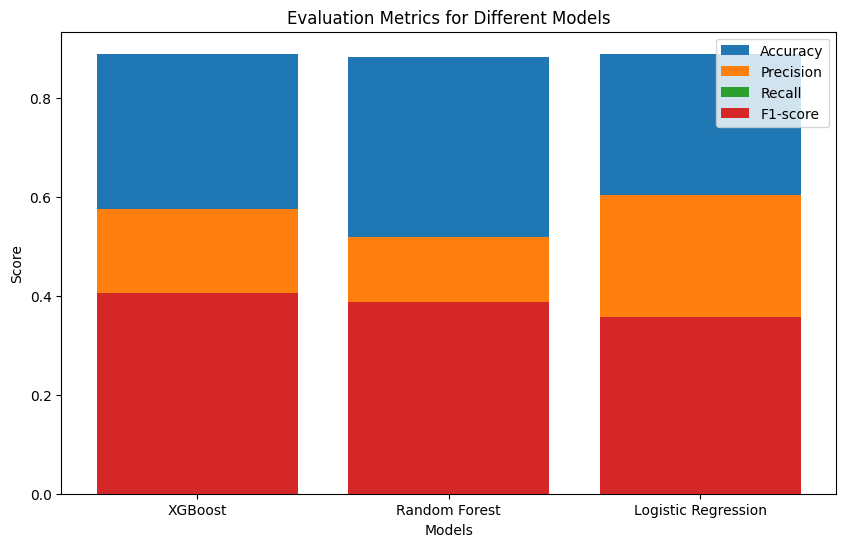

In [ ]:
models = ['XGBoost', 'Random Forest', 'Logistic Regression']
accuracy3 = [0.889, 0.883, 0.890]
precision3 = [0.575, 0.520, 0.604]
recall3 = [0.314, 0.309, 0.253]
f1_score3 = [0.406, 0.387, 0.357]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy3, label='Accuracy')
plt.bar(models, precision3, label='Precision')
plt.bar(models, recall3, label='Recall')
plt.bar(models, f1_score3, label='F1-score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Different Models')
plt.legend()
plt.show()

Teniendo en cuenta el contexto específico del problema como banco portugués, el énfasis en diferentes métricas y compensaciones puede variar. Por ejemplo, si el banco desea centrarse en minimizar los falsos positivos (precisión), es posible que prefiera el modelo de regresión logística. Sin embargo, si capturar todas las instancias positivas potenciales (recuperación) es más importante, entonces el modelo XGBoost podría ser una mejor opción.

In [ ]:
# Sobreajuste Modelo XGB

train_preds = xgb_model.predict(X1_train)
train_accuracy = accuracy_score(y1_train, train_preds)
train_precision = precision_score(y1_train, train_preds)
train_recall = recall_score(y1_train, train_preds)
train_f1_score = f1_score(y1_train, train_preds)

test_preds = xgb_model.predict(X1_test)
test_accuracy = accuracy_score(y1_test, test_preds)
test_precision = precision_score(y1_test, test_preds)
test_recall = recall_score(y1_test, test_preds)
test_f1_score = f1_score(y1_test, test_preds)

print("Training Set Performance:")
print("Accuracy: ", train_accuracy)
print("Precision: ", train_precision)
print("Recall: ", train_recall)
print("F1-score: ", train_f1_score)

print("\nTesting/Validation Set Performance:")
print("Accuracy: ", test_accuracy)
print("Precision: ", test_precision)
print("Recall: ", test_recall)
print("F1-score: ", test_f1_score)

Training Set Performance:
Accuracy:  0.9105994442238984
Precision:  0.8013100436681223
Recall:  0.4374255065554231
F1-score:  0.5659213569776407

Testing/Validation Set Performance:
Accuracy:  0.8894887265798667
Precision:  0.5748792270531401
Recall:  0.31398416886543534
F1-score:  0.4061433447098976


Según estas métricas, parece que el modelo se está desempeñando ligeramente mejor en el conjunto de entrenamiento en comparación con el conjunto de prueba/validación. Sin embargo, el rendimiento en el conjunto de prueba/validación sigue siendo razonablemente bueno, lo que indica que el modelo se está generalizando bien a los datos no vistos. No hay evidencia clara de sobreajuste, pero puede ser necesario un análisis y una evaluación adicional para sacar conclusiones más definitivas.

In [ ]:
# Feature Importance

importance_scores = xgb_model.feature_importances_
feature_importance = dict(zip(X1_train.columns, importance_scores))
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

nr.employed: 0.48630544543266296
emp.var.rate: 0.11220152676105499
poutcome: 0.06880059093236923
pdays: 0.050979312509298325
cons.conf.idx: 0.045390937477350235
euribor3m: 0.03331422060728073
contact: 0.02593524381518364
month: 0.021046888083219528
cons.price.idx: 0.019766464829444885
day_of_week: 0.01803537830710411
campaign: 0.015603638254106045
education: 0.015460757538676262
job: 0.015283455140888691
age: 0.015037426725029945
housing: 0.014916163869202137
previous: 0.014453470706939697
loan: 0.014444990083575249
marital: 0.013024060055613518


In [ ]:
# Umbral de Probabilidad
predicted_probs = xgb_model.predict_proba(X1_test)[:, 1]
predicted_probs

array([0.21228497, 0.05370929, 0.05500792, ..., 0.02755689, 0.03399559,
       0.06851194], dtype=float32)

In [ ]:
thresholds = np.arange(0, 1.1, 0.1)  # rango

for threshold in thresholds:

    y_pred = np.where(predicted_probs >= threshold, 1, 0)

    precision = precision_score(y1_test, y_pred)
    recall = recall_score(y1_test, y_pred)
    f1 = f1_score(y1_test, y_pred)

    print(f"Threshold: {threshold:.1f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()

Threshold: 0.0
Precision: 0.1204
Recall: 1.0000
F1-score: 0.2149

Threshold: 0.1
Precision: 0.3151
Recall: 0.7282
F1-score: 0.4398

Threshold: 0.2
Precision: 0.4233
Recall: 0.6042
F1-score: 0.4978

Threshold: 0.3
Precision: 0.4753
Recall: 0.5330
F1-score: 0.5025

Threshold: 0.4
Precision: 0.5131
Recall: 0.4142
F1-score: 0.4584

Threshold: 0.5
Precision: 0.5749
Recall: 0.3140
F1-score: 0.4061

Threshold: 0.6
Precision: 0.5806
Recall: 0.1900
F1-score: 0.2863

Threshold: 0.7
Precision: 0.6667
Recall: 0.1214
F1-score: 0.2054

Threshold: 0.8
Precision: 0.6842
Recall: 0.0686
F1-score: 0.1247

Threshold: 0.9
Precision: 0.7500
Recall: 0.0317
F1-score: 0.0608

Threshold: 1.0
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A medida que el umbral disminuye (pasando de 1,0 a 0,0), la precisión aumenta mientras que la recuperación disminuye. Esto significa que más instancias se clasifican como positivas, lo que lleva a una mayor proporción de predicciones positivas verdaderas, pero también a una tasa más alta de falsos positivos.
Un umbral de 0,2 produce una puntuación F1 relativamente más alta de 0,4978, lo que indica un mejor equilibrio entre precisión y recuperación.
A medida que el umbral aumenta más allá de 0,2, la precisión sigue aumentando mientras que la recuperación disminuye, lo que da como resultado una puntuación F1 más baja. Esto sugiere una mayor tasa de falsos negativos.

In [ ]:
best_threshold = 0.3

In [ ]:
binary_predictions = np.where(predicted_probs >= best_threshold, 1, 0)
binary_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_adjusted = accuracy_score(y1_test, binary_predictions)
precision_adjusted = precision_score(y1_test, binary_predictions)
recall_adjusted = recall_score(y1_test, binary_predictions)
f1_adjusted = f1_score(y1_test, binary_predictions)

# comparamos
print("Previous Model Performance:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-score: {xgb_f1}")
print()
print("Adjusted Model Performance:")
print(f"Accuracy: {accuracy_adjusted:.4f}")
print(f"Precision: {precision_adjusted:.4f}")
print(f"Recall: {recall_adjusted:.4f}")
print(f"F1-score: {f1_adjusted:.4f}")

Previous Model Performance:
Accuracy: 0.8894887265798667
Precision: 0.5748792270531401
Recall: 0.31398416886543534
F1-score: 0.4061433447098976

Adjusted Model Performance:
Accuracy: 0.8730
Precision: 0.4753
Recall: 0.5330
F1-score: 0.5025


In [ ]:
# Red Neuronal con Tensorflow - Cluster_0

In [18]:
cluster_0_data

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,1.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,-0.002309,0,1,2.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,1.820911,0,1,5.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,0.093650,1,1,6.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,0.093650,1,1,6.0,0,0,1,6,1,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25439,-0.865939,0,2,6.0,1,0,0,7,2,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.493457,-2.815697,1
25440,-0.194227,3,0,4.0,1,1,0,7,2,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.493457,-2.815697,0
25441,-0.386145,0,1,6.0,0,0,0,7,0,-0.204909,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
25442,-0.290186,0,1,6.0,1,0,0,7,0,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


In [22]:
X = cluster_0_data.drop(["y"], axis=1)
y = cluster_0_data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/60
637/637 [==============================] - 3s 3ms/step - loss: 0.3595 - auc: 0.6451 - val_loss: 0.2769 - val_auc: 0.7641
Epoch 2/60
637/637 [==============================] - 1s 2ms/step - loss: 0.3084 - auc: 0.7119 - val_loss: 0.2707 - val_auc: 0.7658
Epoch 3/60
637/637 [==============================] - 2s 2ms/step - loss: 0.2942 - auc: 0.7320 - val_loss: 0.2685 - val_auc: 0.7740
Epoch 4/60
637/637 [==============================] - 2s 3ms/step - loss: 0.2895 - auc: 0.7367 - val_loss: 0.2705 - val_auc: 0.7686
Epoch 5/60
637/637 [==============================] - 2s 4ms/step - loss: 0.2850 - auc: 0.7447 - val_loss: 0.2689 - val_auc: 0.7729
Epoch 6/60
637/637 [==============================] - 2s 3ms/step - loss: 0.2814 - auc: 0.7481 - val_loss: 0.2703 - val_auc: 0.7684
Epoch 7/60
637/637 [==============================] - 2s 2ms/step - loss: 0.2811 - auc: 0.7480 - val_loss: 0.2694 - val_auc: 0.7720
Epoch 8/60
637/637 [==============================] - 2s 2ms/step - loss: 0.

In [25]:
resultados = model.evaluate(X_test, y_test)
print("Test Loss:", resultados[0])
print("Test AUC-ROC:", resultados[1])

160/160 [==============================] - 0s 1ms/step - loss: 0.2684 - auc: 0.7743
Test Loss: 0.2684067189693451
Test AUC-ROC: 0.7742844820022583


In [26]:
predicts = model.predict(X_test)
predlabels = np.argmax(predicts, axis=1)
print("Predicted Labels:", predlabels)

160/160 [==============================] - 0s 1ms/step
Predicted Labels: [0 0 0 ... 0 0 0]


In [27]:
ground_truth = y_test.values
print("Ground Truth Labels:", ground_truth)

Ground Truth Labels: [0 0 0 ... 0 0 0]


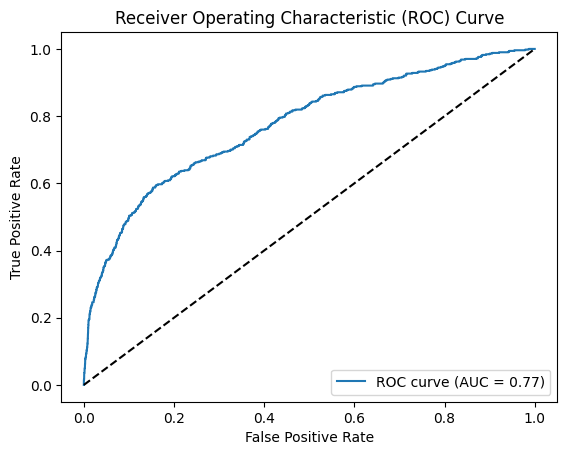

AUC-ROC: 0.7744227207422409


In [28]:
fpr, tpr, thresholds = roc_curve(ground_truth, predicts[:, 0])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC:", roc_auc)

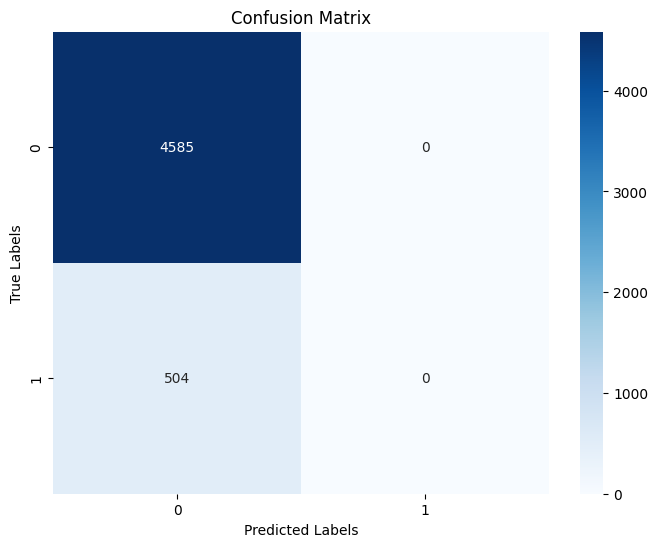

In [29]:
confusion_mtx = confusion_matrix(ground_truth, predlabels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

El modelo no acierta nunca los "si" de y, vamos a ver si lo podemos mejorar

In [30]:
# Hyperparemter Tuning

parameter_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'alpha': [0.0001, 0.001, 0.01],
}

clf = MLPClassifier(random_state=42)

grid_search = GridSearchCV(clf, parameter_grid, cv=3)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh', 'sigmoid'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)]})

In [31]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(" Accuracy:", accuracy)

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,)}
 Accuracy: 0.90548241304775


In [32]:
accuracy_nn2 = accuracy_score(y_test, y_pred)
recall_nn2 = recall_score(y_test, y_pred)
precision_nn2 = precision_score(y_test, y_pred)
f1_nn2 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_nn2)
print("Recall:", recall_nn2)
print("Precision:", precision_nn2)
print("F1 score:", f1_nn2)

Accuracy: 0.90548241304775
Recall: 0.19047619047619047
Precision: 0.5680473372781065
F1 score: 0.2852897473997028


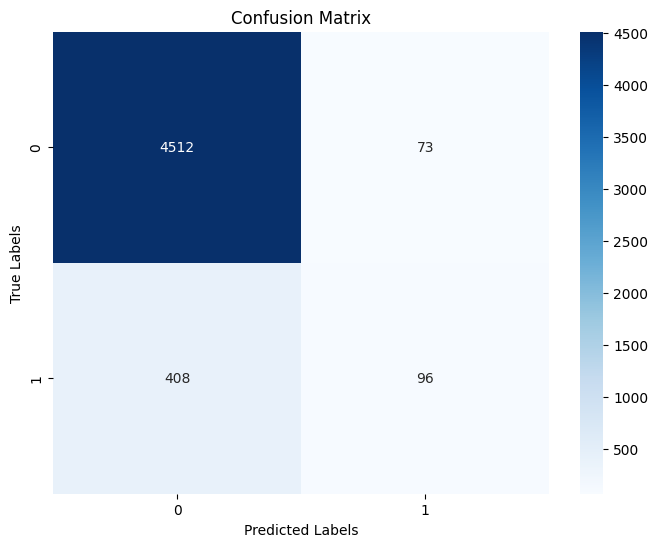

In [33]:
confusion_mtx2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
probs = best_model.predict_proba(X_test)[:, 1]
len(probs)

5089

In [51]:
umbral = np.arange(0, 1.1, 0.1)  # range

for u in umbral:
    y_pred = np.where(probs >= u, 1, 0)

    precision_nn = precision_score(y_test, y_pred)
    recall_nn = recall_score(y_test, y_pred)
    f1_nn = f1_score(y_test, y_pred)

    print(f"Threshold: {float(u):.1f}")
    print(f"Precision: {precision_nn:.4f}")
    print(f"Recall: {recall_nn:.4f}")
    print(f"F1-score: {f1_nn:.4f}")
    print()

Threshold: 0.0
Precision: 0.0990
Recall: 1.0000
F1-score: 0.1802

Threshold: 0.1
Precision: 0.3004
Recall: 0.5496
F1-score: 0.3885

Threshold: 0.2
Precision: 0.4070
Recall: 0.4127
F1-score: 0.4099

Threshold: 0.3
Precision: 0.4504
Recall: 0.3333
F1-score: 0.3831

Threshold: 0.4
Precision: 0.4979
Recall: 0.2341
F1-score: 0.3185

Threshold: 0.5
Precision: 0.5680
Recall: 0.1905
F1-score: 0.2853

Threshold: 0.6
Precision: 0.5785
Recall: 0.1389
F1-score: 0.2240

Threshold: 0.7
Precision: 0.5926
Recall: 0.0952
F1-score: 0.1641

Threshold: 0.8
Precision: 0.6279
Recall: 0.0536
F1-score: 0.0987

Threshold: 0.9
Precision: 1.0000
Recall: 0.0198
F1-score: 0.0389

Threshold: 1.0
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
best_umbral = 0.3

In [62]:
binary_pred = np.where(probs >= best_umbral, 1, 0)
binary_pred

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
accuracy_umbral = accuracy_score(y_test, binary_pred)
precision_umbral = precision_score(y_test, binary_pred)
recall_umbral = recall_score(y_test, binary_pred)
f1_umbral = f1_score(y_test, binary_pred)

# comparamos
print("Previous Model Performance:")
print(f"Accuracy: {accuracy_nn2}")
print(f"Precision: {precision_nn2}")
print(f"Recall: {recall_nn2}")
print(f"F1-score: {f1_nn2}")
print()
print("Adjusted Model Performance:")
print(f"Accuracy: {accuracy_umbral:.4f}")
print(f"Precision: {precision_umbral:.4f}")
print(f"Recall: {recall_umbral:.4f}")
print(f"F1-score: {f1_umbral:.4f}")

Previous Model Performance:
Accuracy: 0.90548241304775
Precision: 0.5680473372781065
Recall: 0.19047619047619047
F1-score: 0.2852897473997028

Adjusted Model Performance:
Accuracy: 0.8937
Precision: 0.4504
Recall: 0.3333
F1-score: 0.3831


Priorizamos mejorar el recall y el F1, en eso basamos la decision del umbral dado que el modelo inicial tenía un recall muy bajo

El modelo tiene un bien rendimiento pero creemos que con este dataset y este caso en concreto, no hace falta emplear una red neuronal. Se puede trabajar y ajustar perfectamente los modelos como el de XGBoost y supondrán un menor coste computacional. Cuando haya más datos (y sobretodo más "si"s en la variable target), se podría emplear una red neuronal.